In [12]:
%pip install matplotlib --quiet
%pip install numpy --quiet
%pip install pandas --quiet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from src.guloso import labirinto_gulosos
from src.backtracking import labirinto_backtracking

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt

def gerar_labirinto(linhas, colunas):
    # Garante que as dimensões sejam ímpares
    if linhas % 2 == 0:
        linhas += 1
    if colunas % 2 == 0:
        colunas += 1

    # Inicializa o labirinto todo com paredes (1)
    labirinto = [[1 for _ in range(colunas)] for _ in range(linhas)]

    # Gera a lista de células válidas para caminhos (ímpares)
    def vizinhos_validos(x, y):
        vizinhos = []
        for dx, dy in [(-2, 0), (2, 0), (0, -2), (0, 2)]:
            nx, ny = x + dx, y + dy
            if 1 <= nx < linhas - 1 and 1 <= ny < colunas - 1:
                if labirinto[nx][ny] == 1:
                    vizinhos.append((nx, ny))
        random.shuffle(vizinhos)
        return vizinhos

    def dfs(start_x, start_y):
        stack = [(start_x, start_y)]
        labirinto[start_x][start_y] = 0
        
        while stack:
            x, y = stack[-1]
            vizinhos = vizinhos_validos(x, y)
            
            if not vizinhos:
                stack.pop()
                continue
            
            nx, ny = vizinhos[0]
            if labirinto[nx][ny] == 1:
                labirinto[(x + nx) // 2][(y + ny) // 2] = 0
                labirinto[nx][ny] = 0
                stack.append((nx, ny))
            else:
                stack.pop()
    
    # Define entrada
    entrada_x = random.randrange(1, linhas - 1, 2)
    entrada_y = 0  # A entrada está na borda esquerda
    labirinto[entrada_x][entrada_y] = 0

    # Define uma saída garantida na borda direita
    saida_x = random.randrange(1, linhas - 1, 2)
    saida_y = colunas - 1
    
    # Inicia DFS a partir da entrada para garantir um caminho principal
    dfs(entrada_x, 1)
    
    # Garante que existe pelo menos uma saída acessível
    labirinto[saida_x][saida_y] = 0
    
    # Se a célula adjacente à saída for parede, cria uma passagem
    if labirinto[saida_x][saida_y - 1] == 1:
        labirinto[saida_x][saida_y - 1] = 0
    
    # Adiciona passagens extras aleatórias para criar ramificações
    def adicionar_passagens_extras(tentativas=0.05):
        total = int(linhas * colunas * tentativas)
        for _ in range(total):
            x = random.randrange(1, linhas - 1, 2)
            y = random.randrange(1, colunas - 1, 2)
            dirs = [(0, 1), (1, 0), (0, -1), (-1, 0)]
            random.shuffle(dirs)
            for dx, dy in dirs:
                nx, ny = x + dx, y + dy
                if 0 < nx < linhas - 1 and 0 < ny < colunas - 1:
                    if labirinto[nx][ny] == 1:
                        labirinto[nx][ny] = 0
                        break

    adicionar_passagens_extras()
    saidas = [(saida_x, saida_y)]
    
    return labirinto, (entrada_x, entrada_y), saidas


def plot_maze(maze, entrance, saidas):
    maze_array = np.array(maze)
    plt.imshow(maze_array, cmap='binary', interpolation='nearest')
    
    plt.xticks([]), plt.yticks([])
    plt.gca().invert_yaxis()
    
    plt.scatter(entrance[1], entrance[0], color='green', label='Entrada', s=100)
    for end in saidas:
        plt.scatter(end[1], end[0], color='red', label='Saída', s=100)
    
    plt.title('Labirinto Gerado')
    plt.show()


## Gerar caminhos

In [ ]:
teste = [10,20,30,40,50,60,70,80]

In [6]:
labirintos = []

for i in teste:
    labirinto, start, ends = gerar_labirinto(i, i)
    labirintos.append((labirinto,start, ends))
    print(f"Labirinto {i}x{i} gerado com sucesso.")
    # plot_maze(labirinto, start, ends)

Labirinto 10x10 gerado com sucesso.
Labirinto 20x20 gerado com sucesso.
Labirinto 30x30 gerado com sucesso.
Labirinto 40x40 gerado com sucesso.
Labirinto 50x50 gerado com sucesso.
Labirinto 60x60 gerado com sucesso.


In [7]:
import gc
import time
import tracemalloc

def measure_performance(func, args):
    gc.collect()  # Força coleta de lixo antes da medição
    
    # Mede tempo
    inicio = time.time()
    
    # Mede memória
    tracemalloc.start()
    result = func(*args)  # Desempacota os argumentos do tuple
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    # Calcula tempo
    fim = time.time()
    tempo = fim - inicio
    
    return result, tempo, peak / 1024

In [8]:
def caminho_guloso(maze, start, end):
    caminho = []
    visitado = [[False]*len(maze[0]) for _ in range(len(maze))]
    _,tempo,memoria = measure_performance(labirinto_gulosos, (maze, start[0], start[1], caminho, visitado, end))
    return caminho,tempo,memoria

def caminho_backtracking(maze, start, end):
    caminho = []
    visitado = [[False]*len(maze[0]) for _ in range(len(maze))]
    _,tempo,memoria = measure_performance(labirinto_backtracking, (maze, start[0], start[1], caminho, visitado, end))
    # labirinto_backtracking(maze, start[0], start[1], caminho, visitado, end)
    return caminho, tempo, memoria

In [9]:
def plot_maze(maze, caminho_guloso, caminho_backtracking, start, end):
    maze_array = np.array(maze)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
    
    ax1.imshow(maze_array, cmap='binary', interpolation='nearest')
    ax1.set_xticks([]), ax1.set_yticks([])
    ax1.invert_yaxis()
    
    for (x, y) in caminho_guloso:
        ax1.scatter(y, x, color='blue', s=20)
    
    ax1.scatter(start[1], start[0], color='green', s=100)
    ax1.scatter(end[1], end[0], color='red', s=100)
    ax1.set_title('Algoritmo Guloso')
    
    ax2.imshow(maze_array, cmap='binary', interpolation='nearest')
    ax2.set_xticks([]), ax2.set_yticks([])
    ax2.invert_yaxis()

    for (x, y) in caminho_backtracking:
        ax2.scatter(y, x, color='orange', s=20)
    
    ax2.scatter(start[1], start[0], color='green', s=100)
    ax2.scatter(end[1], end[0], color='red', s=100)
    ax2.set_title('Algoritmo Backtracking')
    
    plt.tight_layout()
    plt.show()


In [10]:
resultados_guloso = []
resultados_backtracking = []

for maze,start,ends in labirintos:
    args_cam = (maze, start, ends[0])
    args_plt = (start, ends[0])

    caminho_guloso_caminho,tempo_guloso,memoria_guloso = caminho_guloso(*args_cam)
    caminho_backtracking_caminho,tempo_backtracking,memoria_backtracking = caminho_backtracking(*args_cam)

    resultados_guloso.append((len(maze)-1,tempo_guloso, memoria_guloso))
    resultados_backtracking.append((len(maze)-1,tempo_backtracking, memoria_backtracking))

    # plot_maze(maze, caminho_guloso_caminho, caminho_backtracking_caminho, *args_plt)
print("Resultados do Algoritmo Guloso:")
for i in resultados_guloso:
    print(f"Labirinto {i[0]}x{i[0]}: Tempo: {i[1]:.4f}s, Memória: {i[2]:.2f}KB")
    
print("\nResultados do Algoritmo Backtracking:")
for i in resultados_backtracking:
    print(f"Labirinto {i[0]}x{i[0]}: Tempo: {i[1]:.4f}s, Memória: {i[2]:.2f}KB")
    

Resultados do Algoritmo Guloso:
Labirinto 10x10: Tempo: 0.0003s, Memória: 1.56KB
Labirinto 20x20: Tempo: 0.0008s, Memória: 5.91KB
Labirinto 30x30: Tempo: 0.0010s, Memória: 9.92KB
Labirinto 40x40: Tempo: 0.0014s, Memória: 16.84KB
Labirinto 50x50: Tempo: 0.0022s, Memória: 28.88KB
Labirinto 60x60: Tempo: 0.0036s, Memória: 33.14KB

Resultados do Algoritmo Backtracking:
Labirinto 10x10: Tempo: 0.0001s, Memória: 1.12KB
Labirinto 20x20: Tempo: 0.0002s, Memória: 2.54KB
Labirinto 30x30: Tempo: 0.0006s, Memória: 3.84KB
Labirinto 40x40: Tempo: 0.0049s, Memória: 10.15KB
Labirinto 50x50: Tempo: 0.0013s, Memória: 8.65KB
Labirinto 60x60: Tempo: 0.0045s, Memória: 20.74KB


# Graficos

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [27]:
def formatar_dados(results):
    return pd.DataFrame(results, columns=['Qtd', 'Tempo', 'Memoria'])

In [28]:
dados_algoritmo_guloso = formatar_dados(resultados_guloso)
dados_algoritmo_guloso

,Qtd,Tempo,Memoria
0,10,0.000306,1.562500
1,20,0.000796,5.914062
2,30,0.001029,9.921875
3,40,0.001441,16.835938
4,50,0.002195,28.882812
5,60,0.003628,33.140625


In [29]:
dados_algoritmo_backtracking = formatar_dados(resultados_backtracking)
dados_algoritmo_guloso

,Qtd,Tempo,Memoria
0,10,0.000306,1.562500
1,20,0.000796,5.914062
2,30,0.001029,9.921875
3,40,0.001441,16.835938
4,50,0.002195,28.882812
5,60,0.003628,33.140625


In [30]:
def gerar_graficos(data):
    # Converte os dados de tempo e memória para float
    data["Tempo"] = data["Tempo"].astype(float)
    data["Memoria"] = data["Memoria"].astype(float)
    data["Qtd"] = data["Qtd"].astype(int)

    # Configura os gráficos lado a lado
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Configura o formatador para evitar notação científica nos eixos
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    formatter.set_useOffset(False)

    # Gráfico de Temp
    axes[0].plot(data["Qtd"], data["Tempo"], marker='o', label="Tempo")
    axes[0].set_title("Tempo de Execução")
    axes[0].set_xlabel("Quantidade de Palavras")
    axes[0].set_ylabel("Tempo (s)")
    axes[0].grid(True)
    axes[0].legend()
    axes[0].yaxis.set_major_formatter(formatter)

    # Gráfico de Memória
    axes[1].plot(data["Qtd"], data["Memoria"], marker='o', color='orange', label="Memória")
    axes[1].set_title("Uso de Memória")
    axes[1].set_xlabel("Quantidade de letras")
    axes[1].set_ylabel("Memória (KB)")
    axes[1].grid(True)
    axes[1].legend()
    axes[1].yaxis.set_major_formatter(formatter)

    # Exibe os valores reais nos gráficos formatados
    for i, row in data.iterrows():
        axes[0].text(row["Qtd"], row["Tempo"], f"{row['Tempo']:.6f}", fontsize=9, ha='right')  # Formata para 4 casas decimais
        axes[1].text(row["Qtd"], row["Memoria"], f"{row['Memoria']:.2f}", fontsize=9, ha='right')  # Formata para 2 casas decimais

    plt.tight_layout()
    plt.show()

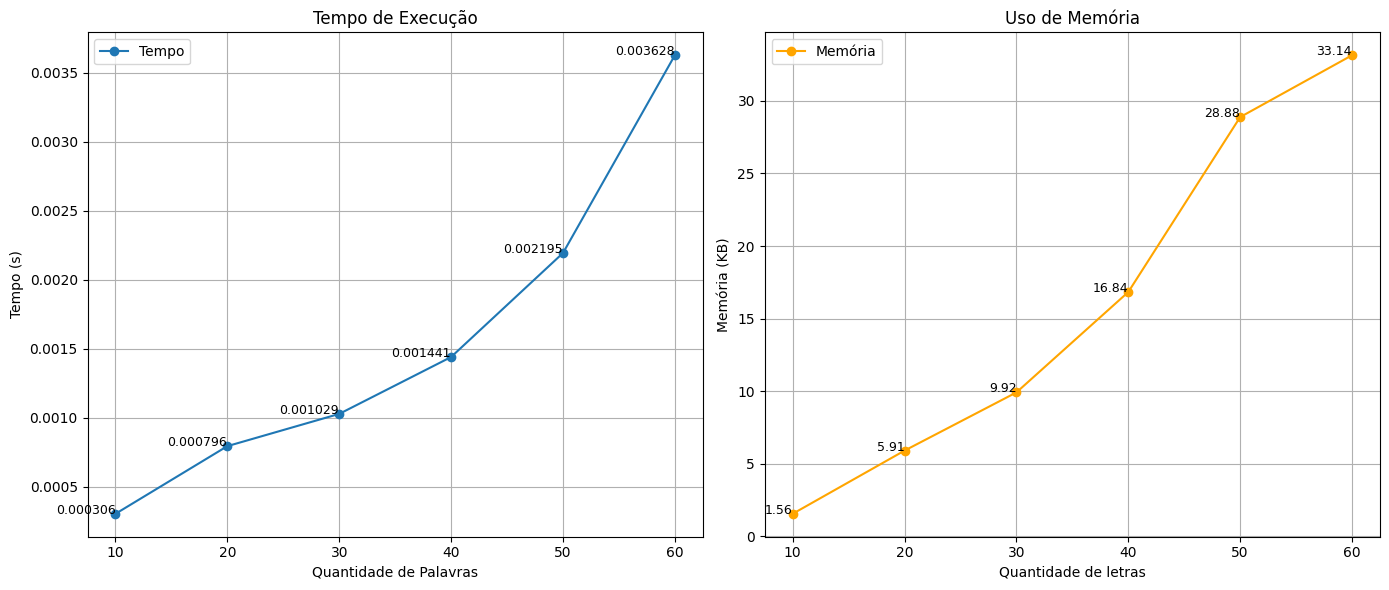

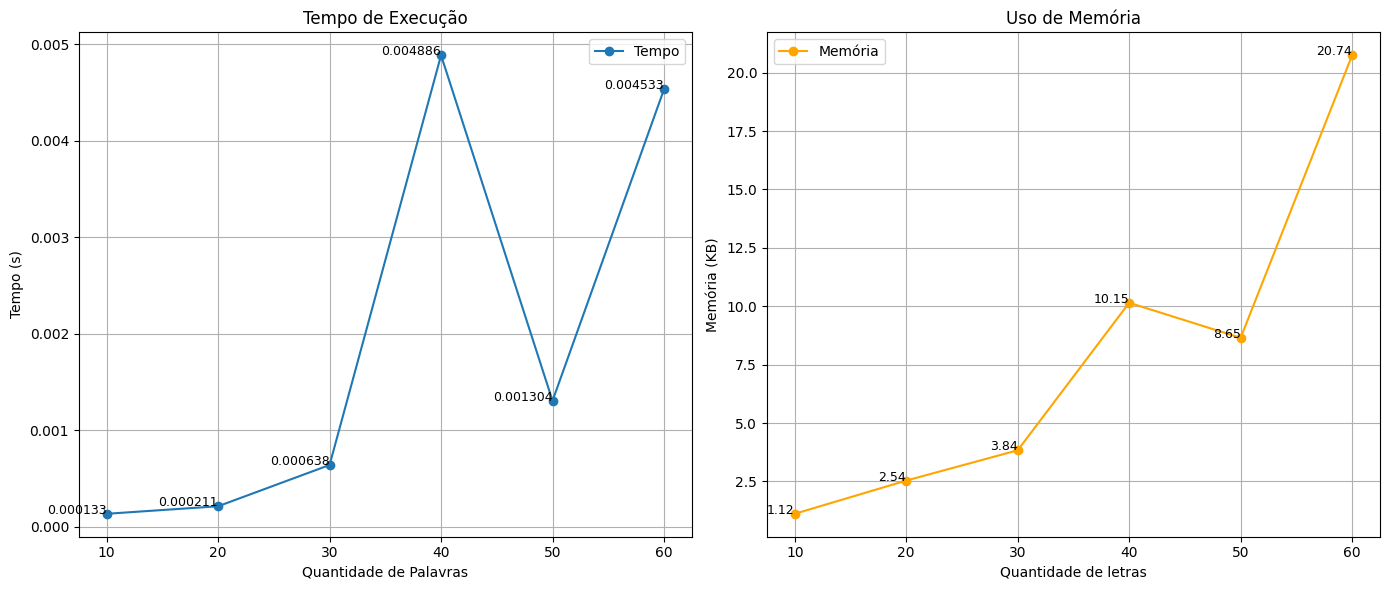

In [31]:
gerar_graficos(dados_algoritmo_guloso)
gerar_graficos(dados_algoritmo_backtracking)

In [36]:
def gerar_graficos_comparativos(data1, data2, label1="Método 1", label2="Método 2"):
  # Converte os dados de tempo e memória para float
  data1["Tempo"] = data1["Tempo"].astype(float)
  data1["Memoria"] = data1["Memoria"].astype(float)
  data1["Qtd"] = data1["Qtd"].astype(int)

  data2["Tempo"] = data2["Tempo"].astype(float)
  data2["Memoria"] = data2["Memoria"].astype(float)
  data2["Qtd"] = data2["Qtd"].astype(int)

  # Configura os gráficos lado a lado
  fig, axes = plt.subplots(1, 2, figsize=(14, 6))

  # Configura o formatador para evitar notação científica nos eixos
  formatter = ScalarFormatter()
  formatter.set_scientific(False)
  formatter.set_useOffset(False)

  # Gráfico de Tempo
  axes[0].plot(data1["Qtd"], data1["Tempo"], marker='o', label=label1)
  axes[0].plot(data2["Qtd"], data2["Tempo"], marker='o', label=label2)
  axes[0].set_title("Comparativo de Tempo de Execução")
  axes[0].set_xlabel("Proporção do Labirinto")
  axes[0].set_ylabel("Tempo (s)")
  axes[0].grid(True)
  axes[0].legend()
  axes[0].yaxis.set_major_formatter(formatter)

  # Gráfico de Memória
  axes[1].plot(data1["Qtd"], data1["Memoria"], marker='o', label=label1)
  axes[1].plot(data2["Qtd"], data2["Memoria"], marker='o', label=label2)
  axes[1].set_title("Comparativo de Uso de Memória")
  axes[1].set_xlabel("Proporção do Labirinto")
  axes[1].set_ylabel("Memória (KB)")
  axes[1].grid(True)
  axes[1].legend()
  axes[1].yaxis.set_major_formatter(formatter)

  # Exibe os valores reais nos gráficos formatados
  for i, row in data1.iterrows():
    axes[0].text(row["Qtd"], row["Tempo"], f"{row['Tempo']:.6f}", fontsize=9, ha='right')
    axes[1].text(row["Qtd"], row["Memoria"], f"{row['Memoria']:.2f}", fontsize=9, ha='right')

  for i, row in data2.iterrows():
    axes[0].text(row["Qtd"], row["Tempo"], f"{row['Tempo']:.6f}", fontsize=9, ha='left')
    axes[1].text(row["Qtd"], row["Memoria"], f"{row['Memoria']:.2f}", fontsize=9, ha='left')

  plt.tight_layout()
  plt.show()

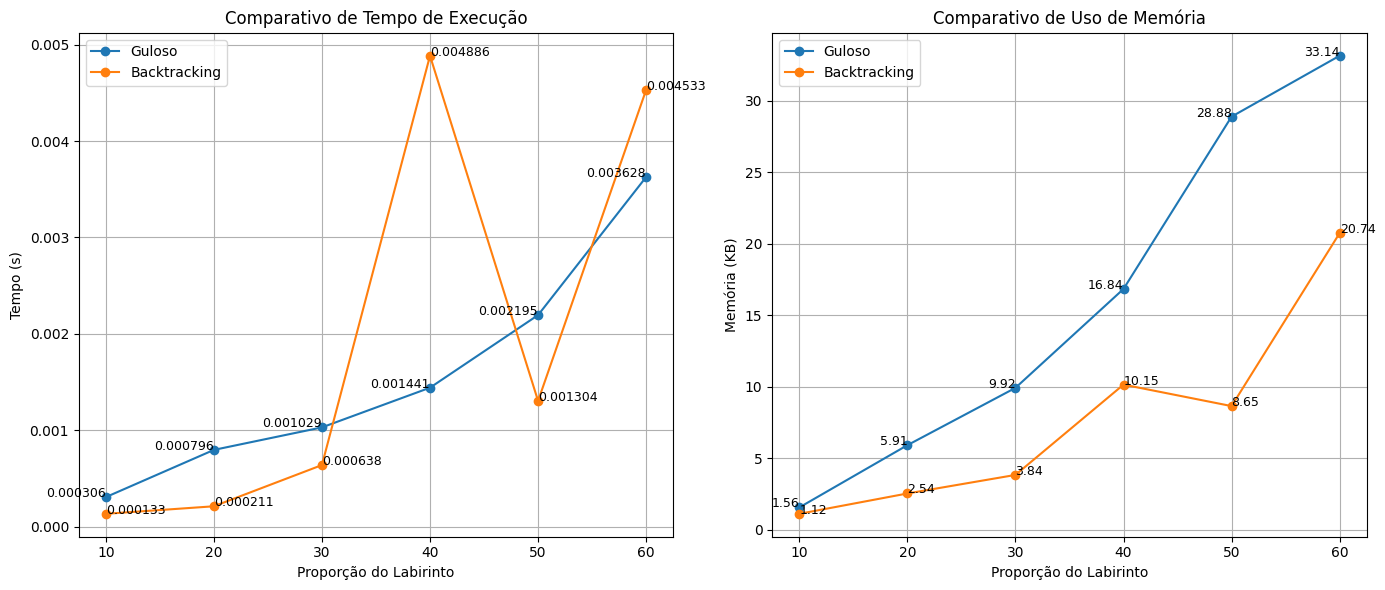

In [37]:
gerar_graficos_comparativos(dados_algoritmo_guloso, dados_algoritmo_backtracking, label1="Guloso", label2="Backtracking")